In [61]:
import bagpy
import math
import numpy as np
import pandas
import allantools
import matplotlib.pyplot as plt
bag_read=bagpy.bagreader("C:\\Users\\nitin\\OneDrive\\Desktop\\RSN_DATA\\nitin.bag")
bag_string=bag_read.message_by_topic('/imu')
data_read=pandas.read_csv(bag_string)

[INFO]  Data folder C:\Users\nitin\OneDrive\Desktop\RSN_DATA\nitin already exists. Not creating.


In [62]:
x_data=data_read["imu.x"]
x=np.array(x_data).tolist()
y_data=data_read["imu.y"]
y=np.array(y_data).tolist()
z_data=data_read["imu.z"]
z=np.array(z_data).tolist()
w_data=data_read["imu.w"]
w=np.array(w_data).tolist()


In [63]:
def quat_to_euler(x,y,z,w):
    t0=+2.0*(w*x+y*z)
    t1=+1.0-2.0*(x*x+y*y)
    roll_x=math.atan2(t0,t1)

    t2=+2.0*(w*y-z*x)
    t2=+1.0 if t2>+1.0 else t2
    t2=-1.0 if t2<-1.0 else t2
    pitch_y=math.asin(t2)
    
    t3=+2.0*(w*z+x*y)
    t4=+1.0 -2.0*(y*y+z*z)
    yaw_z=math.atan2(t3,t4)
    roll_x=np.rad2deg(roll_x)
    pitch_y=np.rad2deg(pitch_y)
    yaw_z=np.rad2deg(yaw_z)
    return roll_x,pitch_y,yaw_z


In [64]:
euler_x=[]
euler_y=[]
euler_z=[]
for i in range(len(x)):
    [converted_x,converted_y,converted_z]=quat_to_euler(x[i],y[i],z[i],w[i])
    euler_x.append(converted_x)
    euler_y.append(converted_y)
    euler_z.append(converted_z)




In [67]:
data_time=data_read["Header.stamp.secs"]
data_time=data_time-data_time[0]


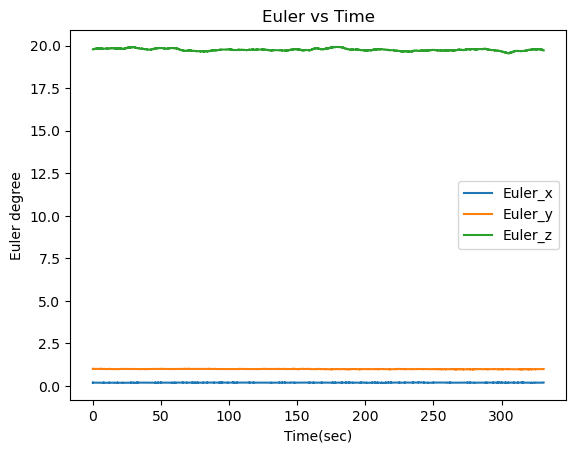

In [68]:
fig, ax = plt.subplots()
plt.plot(data_time,euler_x,label = "Euler_x")
plt.plot(data_time,euler_y,label = "Euler_y")
plt.plot(data_time,euler_z,label = "Euler_z")
plt.xlabel('Time(sec)')
plt.ylabel('Euler degree')
plt.title("Euler vs Time")
plt.legend()
plt.show()